In [1]:
import json

# Function to read a JSON file
def read_json_file_line_by_line(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

# Replace 'your_file_path_here' with the actual file paths
board_to_category_path = 'board_to_category.json'
board_to_pin_path = 'board_to_pins.json'
pin_to_img_path = 'pin_to_img.json'

# Reading the files
board_to_category = read_json_file_line_by_line(board_to_category_path)
board_to_pin = read_json_file_line_by_line(board_to_pin_path)
pin_to_img = read_json_file_line_by_line(pin_to_img_path)

# Now you can proceed with the data processing part
# Map boards to categories
board_category_map = {item["board_id"]: item["cate_id"] for item in board_to_category}

# Map pins to boards
pin_board_map = {}
for item in board_to_pin:
    for pin in item["pins"]:
        pin_board_map[pin] = item["board_id"]

# Aggregate images per category
category_image_count = {}
for pin in pin_to_img:
    pin_id = pin["pin_id"]
    if pin_id in pin_board_map:
        board_id = pin_board_map[pin_id]
        if board_id in board_category_map:
            cate_id = board_category_map[board_id]
            category_image_count[cate_id] = category_image_count.get(cate_id, 0) + 1

# The `category_image_count` dictionary now contains the count of images per category
print(category_image_count)

{'97': 4089, '6': 5263, '19': 3775, '14': 2747, '16': 4963, '53': 1803, '7': 5992, '48': 1200, '64': 4968, '10': 6063, '12': 4845, '5': 5352, '17': 7435, '18': 5701, '1': 5812, '11': 6794, '130': 5156, '138': 6139, '9': 7441, '20': 3749, '8': 4998, '78': 6211, '13': 4853, '38': 5114, '21': 5536, '154': 5825, '82': 4760, '23': 8640, '25': 5454, '22': 4518, '24': 3421, '4': 3986, '2': 5431, '26': 4614, '27': 3961, '49': 6589, '15': 5431, '28': 5744, '91': 5322, '104': 6230, '30': 5733, '32': 5790, '31': 4977, '33': 5768, '34': 6205, '35': 5029, '36': 5521, '42': 6076, '39': 5303, '40': 6213, '45': 5537, '44': 5448, '47': 6291, '41': 3148, '43': 4349, '400': 3658, '89': 6026, '112': 4854, '90': 4629, '106': 5851, '132': 5342, '51': 5187, '52': 6336, '50': 5993, '54': 3838, '115': 6335, '108': 5828, '149': 5589, '55': 6274, '156': 5603, '129': 4719, '56': 4848, '57': 5967, '58': 4564, '59': 5158, '144': 4977, '61': 5644, '60': 5442, '124': 3744, '3': 6565, '92': 6702, '63': 4157, '66': 579

In [2]:
def read_category_file(file_path):
    category_map = {}
    with open(file_path, 'r') as file:
        idx = 0
        for line in file:
            idx += 1
            category_name = line.strip()  # Assuming each line is "category_id,category_name"
            category_map[idx] = category_name
    return category_map

# Replace 'path_to_your_category_file.txt' with the actual path to your category.txt file
category_path = 'categories.txt'
category_map = read_category_file(category_path)

print(type(category_map))

<class 'dict'>


In [3]:
category_map

{1: 'New York Fashion',
 2: 'Vegetable Garden',
 3: 'Diy Fashion',
 4: 'Digital Illustration',
 5: 'Romantic Weddings',
 6: 'Interior Design',
 7: 'Senior Pics',
 8: 'India',
 9: 'Pasta',
 10: 'Natural Hair Styles',
 11: 'Cute Outfits',
 12: 'Bachelorette Parties',
 13: 'Peonies',
 14: 'Rock Climbing',
 15: 'Pets',
 16: 'Costume Makeup',
 17: 'Makeup Looks',
 18: 'Boho Chic',
 19: 'Comedy Movies',
 20: 'Cruises',
 21: 'Faith',
 22: 'Sustainable Architecture',
 23: 'Chicken',
 24: '90s Nostalgia',
 25: 'Craft Ideas',
 26: 'Ui Ux Design',
 27: 'Texas',
 28: 'Christmas Trees',
 29: 'Diy Room Decor',
 30: 'Braid Hair Styles',
 31: 'Easter',
 32: 'Breakfast Healthy',
 33: 'Alternative Health',
 34: 'Bohemian Decor',
 35: 'Fandom',
 36: 'Welding',
 37: 'Camping Gear',
 38: 'Japan',
 39: 'Fan Art',
 40: 'Dyed Hair',
 41: 'Horror Movies',
 42: 'Nail Designs',
 43: 'Small Businesses',
 44: 'Math',
 45: 'Landscape Design',
 46: 'Homemade Costumes',
 47: 'First Grade',
 48: 'Bath',
 49: 'Snacks',

In [4]:
# Assuming the previous variables board_to_category, board_to_pin, and pin_to_img are loaded as before
# And also assuming the previous processing steps are completed, we have category_image_count ready

# Now, map the category IDs to names and calculate the number of images for each category name
category_name_image_count = {}
for cate_id, image_count in category_image_count.items():
    category_name = category_map.get(int(cate_id))
    if category_name:
        category_name_image_count[category_name] = image_count

category_name_image_count

{'Android': 4089,
 'Interior Design': 5263,
 'Comedy Movies': 3775,
 'Rock Climbing': 2747,
 'Costume Makeup': 4963,
 'Scary Makeup': 1803,
 'Senior Pics': 5992,
 'Bath': 1200,
 'Bathroom Humor': 4968,
 'Natural Hair Styles': 6063,
 'Bachelorette Parties': 4845,
 'Romantic Weddings': 5352,
 'Makeup Looks': 7435,
 'Boho Chic': 5701,
 'New York Fashion': 5812,
 'Cute Outfits': 6794,
 'London': 5156,
 'Wedding Makeup': 6139,
 'Pasta': 7441,
 'Cruises': 3749,
 'India': 4998,
 'Polyvore': 6211,
 'Peonies': 4853,
 'Japan': 5114,
 'Faith': 5536,
 'Greece': 5825,
 'Paris': 4760,
 'Chicken': 8640,
 'Craft Ideas': 5454,
 'Sustainable Architecture': 4518,
 '90s Nostalgia': 3421,
 'Digital Illustration': 3986,
 'Vegetable Garden': 5431,
 'Ui Ux Design': 4614,
 'Texas': 3961,
 'Snacks': 6589,
 'Pets': 5431,
 'Christmas Trees': 5744,
 'Christmas Decor': 5322,
 'Christmas Decorations': 6230,
 'Braid Hair Styles': 5733,
 'Breakfast Healthy': 5790,
 'Easter': 4977,
 'Alternative Health': 5768,
 'Bohemi

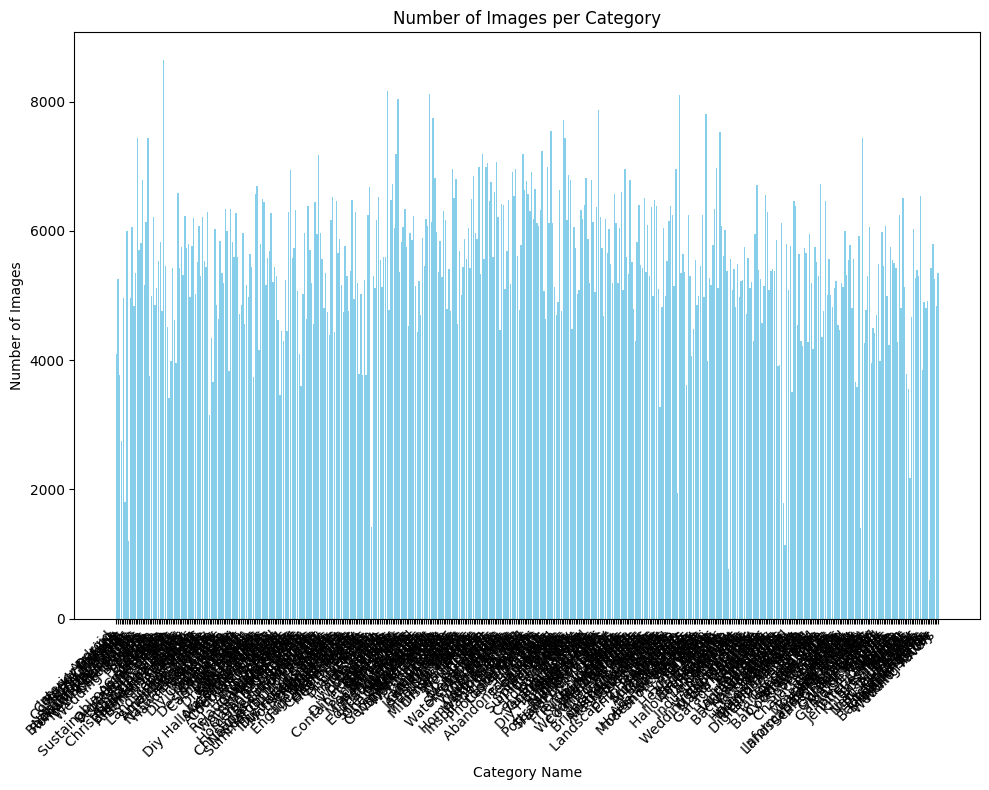

In [5]:
import matplotlib.pyplot as plt

# Assuming category_name_image_count is already populated
categories = list(category_name_image_count.keys())
image_counts = list(category_name_image_count.values())

# Creating the plot
plt.figure(figsize=(10, 8))  # Adjust the size as necessary
plt.bar(categories, image_counts, color='skyblue')
plt.xlabel('Category Name')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')  # Rotate category names for better readability
plt.title('Number of Images per Category')
plt.tight_layout()  # Adjust layout to make room for the rotated category names

# Display the plot
plt.show()

Top 10 categories by # of Images

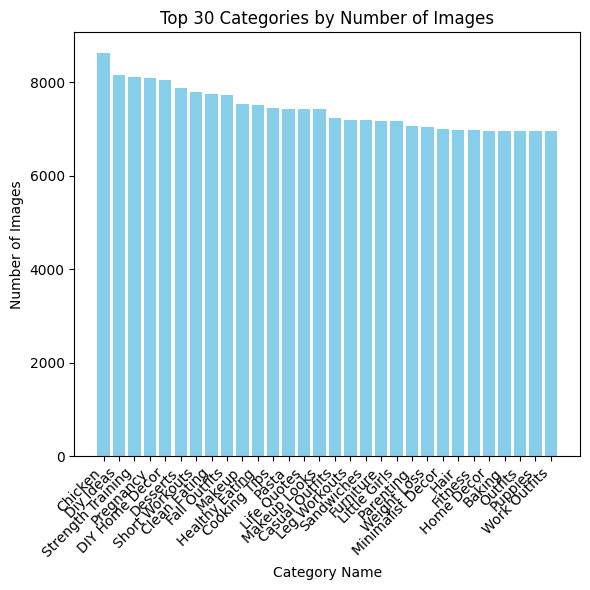

In [6]:
# Re-importing matplotlib as the code execution state was reset
import matplotlib.pyplot as plt

# Sort the dictionary by image count in descending order and select the top 10
top_categories = sorted(category_name_image_count.items(), key=lambda x: x[1], reverse=True)[:30]

# Unpack the top categories into names and counts
categories, image_counts = zip(*top_categories)

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(categories, image_counts, color='skyblue')
plt.xlabel('Category Name')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.title('Top 30 Categories by Number of Images')
plt.tight_layout()

plt.show()


In [7]:
def get_top_images_for_category(category_id, category_map, board_to_category, board_to_pin, pin_to_img, top_n=5):
    # Reverse map category names to IDs (assuming unique category names for simplicity)
    category_name_to_id = {v: k for k, v in category_map.items()}
    
    # Get the category ID for the given category name
    category_id = category_name_to_id.get(category_name)
    if not category_id:
        return "Category not found."
    
    # Find boards associated with this category
    boards_in_category = [item['board_id'] for item in board_to_category if int(item['cate_id']) == category_id]
    
    # Find pins for these boards
    pins_in_category = []
    for board in boards_in_category:
        pins_in_category.extend([pin for item in board_to_pin if item['board_id'] == board for pin in item['pins']])
    
    # Count how many times each pin appears across these boards
    pin_counts = {}
    for pin in pins_in_category:
        pin_counts[pin] = pin_counts.get(pin, 0) + 1
    
    # Sort pins by count, descending, and get the top N
    top_pins = sorted(pin_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    # Fetch the image URLs for the top pins
    top_images = [item for pin_id, _ in top_pins for item in pin_to_img if item['pin_id'] == pin_id]
    
    # Return the image URLs (or objects) for these top pins
    return top_images


category_names = ["Makeup", "Hair"]
top_images = []
for category_name in category_names:
    top_images.extend(get_top_images_for_category(category_name, category_map, board_to_category, board_to_pin, pin_to_img, top_n=5))

top_images

[{'_id': {'$oid': '564c39c1e4b031a411426ca4'},
  'im_url': 'https://s-media-cache-ak0.pinimg.com/originals/d0/24/1e/d0241e6e6c2967f7b1d7ef37025bd06e.jpg',
  'im_name': 'd0241e6e6c2967f7b1d7ef37025bd06e.jpg',
  'pin_id': '161637074102672933'},
 {'_id': {'$oid': '564c39c1e4b031a411426ca5'},
  'im_url': 'https://s-media-cache-ak0.pinimg.com/originals/6c/ac/36/6cac36beae99177f661dcfe45f7869ba.jpg',
  'im_name': '6cac36beae99177f661dcfe45f7869ba.jpg',
  'pin_id': '161637074102672932'},
 {'_id': {'$oid': '564c39c1e4b031a411426ca8'},
  'im_url': 'https://s-media-cache-ak0.pinimg.com/originals/e7/bc/0c/e7bc0ca041799abd4622bd3d481b90e4.jpg',
  'im_name': 'e7bc0ca041799abd4622bd3d481b90e4.jpg',
  'pin_id': '161637074102672908'},
 {'_id': {'$oid': '564c39c1e4b031a411426caa'},
  'im_url': 'https://s-media-cache-ak0.pinimg.com/originals/a1/e9/c8/a1e9c82e3b0f1aa317a28cc6497b7a55.jpg',
  'im_name': 'a1e9c82e3b0f1aa317a28cc6497b7a55.jpg',
  'pin_id': '161637074102672899'},
 {'_id': {'$oid': '564c39c1e

In [8]:
from IPython.display import display, Image

def display_top_images(top_images):
    for img in top_images:
        display(Image(url=img['im_url']))

display_top_images(top_images)

Number of boards per user

In [9]:
import json

# Function to read a JSON file that contains multiple JSON objects, one per line
def read_json_file_line_by_line(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

# Replace this with the path to your board_to_category file
file_path = 'board_to_category.json'
board_to_category_data = read_json_file_line_by_line(file_path)

# Count unique _id ($oid) values
unique_oids = set()
board_count_per_oid = {}

for item in board_to_category_data:
    oid = item['_id']['$oid']
    unique_oids.add(oid)
    # Assuming board_id is the identifier for boards
    board_id = item['board_id']
    if oid not in board_count_per_oid:
        board_count_per_oid[oid] = set([board_id])
    else:
        board_count_per_oid[oid].add(board_id)

# Calculating the average number of boards per unique $oid
total_boards = sum(len(boards) for boards in board_count_per_oid.values())
average_boards_per_oid = total_boards / len(unique_oids) if unique_oids else 0

print(f"Total unique oids: {len(unique_oids)}")
print(f"Average number of boards per unique oid: {average_boards_per_oid}")

Total unique oids: 46000
Average number of boards per unique oid: 1.0


Number of categories per board

In [10]:
# Assuming the board_to_category_data is loaded as before

# Count the number of categories per board
categories_per_board = {}

for item in board_to_category_data:
    board_id = item['board_id']
    # Increment the category count for this board
    if board_id in categories_per_board:
        categories_per_board[board_id] += 1
    else:
        categories_per_board[board_id] = 1

# Calculating max, min, and average
max_categories = max(categories_per_board.values())
min_categories = min(categories_per_board.values())
average_categories = sum(categories_per_board.values()) / len(categories_per_board) if categories_per_board else 0

print(f"Maximum number of categories per board: {max_categories}")
print(f"Minimum number of categories per board: {min_categories}")
print(f"Average number of categories per board: {average_categories:.2f}")


Maximum number of categories per board: 1
Minimum number of categories per board: 1
Average number of categories per board: 1.00


In [11]:
images_per_board = {item['board_id']: len(item['pins']) for item in board_to_pin}

# Note: This simple approach assumes each pin corresponds to one image,
# which aligns with the provided pin_to_img sample. If some pins don't have associated images,
# you might need to adjust this logic to only count pins that have a corresponding entry in pin_to_img.

# Step 2: Calculate the average number of images per board
if images_per_board:
    total_images = sum(images_per_board.values())
    average_images_per_board = total_images / len(images_per_board)
else:
    average_images_per_board = 0

print(f"Average number of images per board: {average_images_per_board:.2f}")

Average number of images per board: 55.77
